## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
proportion = (round((df.query('converted==1').user_id.count() / df.user_id.count()),2))*100
print(str(proportion)+"%")

12.0%


In [6]:
proportion = (round((df.query('converted==1 & group == "control"').user_id.count() / df.user_id.count()),2))*100
print(str(proportion)+"%")

6.0%


In [7]:
proportion = (round((df.query('converted==1 & group == "treatment"').user_id.count() / df.user_id.count()),2))*100
print(str(proportion)+"%")

6.0%


e. The number of times the `new_page` and `treatment` don't match.

In [8]:
(df.query('landing_page != "new_page" & group == "treatment"').user_id.count()) + (df.query('landing_page == "new_page" & group != "treatment"').user_id.count())

3893

f. Do any of the rows have missing values?

In [9]:
df.isnull().sum().any()

False

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2 = df.copy()
drop1 = df2.query('landing_page == "new_page" & group != "treatment"')
drop2 = df2.query('landing_page != "new_page" & group == "treatment"')
df2.drop(drop1.index, inplace = True)
df2.drop(drop2.index, inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [13]:
df.user_id.count() - df2.user_id.count() #checking that the difference btw dataframes matches the number of times the new_page and treatment don't match.

3893

In [14]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [15]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [38]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [16]:
dup=df2.query('index==2893')
dup

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2.drop(dup.index, inplace=True)

In [18]:
df2.user_id.nunique() == df2.user_id.count()  
#checking that all of the values that we have remaining are unique


True

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2.query('converted==1').user_id.count()/df2.user_id.count()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [76]:
df2.groupby('group').mean()

,user_id,converted
group,,
control,788164.072594,0.120386
treatment,787845.719290,0.118808


d. What is the probability that an individual received the new page?

In [8]:
df2.query('landing_page == "new_page"').user_id.count()/df2.user_id.count()


0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**We don't have sufficient evidence to reject the null hypothesis.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**~Response~
<br>
H0 = P > 0.05 --> p_new-p_old<=0  
H1 = P < 0.05 --> p_new-p_old>0

Our null hypothesis states that the old page is better or equal. 
<br>
Type I error probability is Alpha of 0.05 (5%)
<br>
P is the probability of observing an effect granted that the null hypothesis is true.
<br>
Hence, if P is higher than Alpha that means that the results are statistically significant, and we fail to reject the null hypothesis.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
pnew = df2.query('converted==1').user_id.count()/df2.user_id.count()
pnew

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
pold = df2.query('converted==1').user_id.count()/df2.user_id.count()
pold

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new = df2.query('group=="treatment"').user_id.count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = df2.query('group=="control"').user_id.count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.binomial(1,pnew,n_new)
new_page_converted.mean()

0.11954442226963044

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.binomial(1,pold,n_old)
old_page_converted.mean()

0.11925740325178628

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [34]:
new_page_converted.mean() - old_page_converted.mean()

0.00028701901784415618

In [38]:
df_grouped = df2.groupby('group').mean()
df_grouped

,user_id,converted
group,,
control,788164.072594,0.120386
treatment,787845.719290,0.118808


In [41]:
control_converted = df_grouped.query('group == "control"')['converted'].mean()
treatment_converted = df_grouped.query('group == "treatment"')['converted'].mean()
actual_diff = treatment_converted - control_converted
actual_diff

-0.0015782389853555567

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
p_diffs = []
for _ in range(10000):
    k = np.random.binomial(1,pnew,n_new).mean()
    l = np.random.binomial(1,pold,n_old).mean()
    p_diffs.append(k-l)
p_diffs

[-0.00093817681325636393,
 0.00068592521239130289,
 -0.00033939885263355174,
 -0.0013166199661150679,
 0.00086515146198497261,
 -0.00010524408994200263,
 0.0023239921495781524,
 0.0025582765205342944,
 -0.00051843580594602978,
 0.00098235077742177268,
 -0.0011309979086863292,
 -0.00058711435372335585,
 0.00036269025362249685,
 0.0011886592802582002,
 0.00053475498339680683,
 0.0010718607272185016,
 -0.0011377433177614527,
 -0.00076608650290352354,
 0.0011956963079286648,
 -0.0016125390356904606,
 -0.0017089973338187264,
 0.0013539001538498407,
 -0.00043563545241447066,
 0.0017187126480622955,
 -0.00098606829868376489,
 -0.00025689352844115998,
 -0.00049790796012529059,
 -0.00089693182533372162,
 -0.00064892129490476402,
 0.0014226980776603504,
 -0.0010962135327310801,
 -0.00079356610779959813,
 -5.7255398316150008e-05,
 -0.0017847708919112304,
 -0.00017406588895915731,
 -0.00015361478487406488,
 0.0018150191680912225,
 0.00094754423163179169,
 0.0024687017666052691,
 0.0005140122607163

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

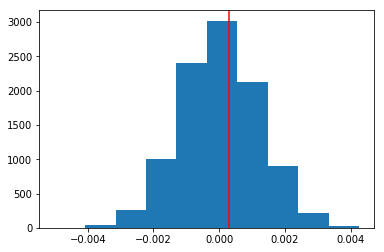

In [28]:
plt.hist(p_diffs);
plt.axvline(x=actual_diff, color = 'red'); # where our sample mean falls on null dist

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [42]:
(p_diffs > actual_diff).mean()

0.91120000000000001

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**response:** P value is the probability of seeing the effect when the null hypothesis is true. It looks like it's 0.7, way higher than our error I threshhold of 0.5. This means that the results we've obtained are statistically significant, and so we've failed to reject the null hypothesis: the conversion rates for the old and the new pages are the same, so we should refrain from implementing the new page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [43]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"')['converted'].sum()
convert_old


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


17489

In [44]:
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()
convert_new

17264

In [45]:
n_old = df2.query('landing_page == "old_page"')['converted'].count()
n_old

145274

In [46]:
n_new = df2.query('landing_page == "new_page"')['converted'].count()
n_new

145310

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [47]:
stat, pval = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old],alternative="larger")
print('{0:0.3f}'.format(pval))

0.905


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Yes, even though the p-value and the z-test are slightly different, both are higher than alpha (0.05), hence we fail to reject the null hypothesis. The conversion rates of both pages apear to be the same.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [48]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [22]:
import statsmodels.api as sm
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [23]:
 results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-16 00:38 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [24]:
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value here is 0.19, which is higher than the 0.05 alpha and that indicates that there is no relationship between conversion rate and treatment group. Our null hypothesis stands true.
<br>
The null hypothesis of a logistic regression is that the term's coefficient is equal to zero, which means there is no association between the term and the response.
<br>
The value differs from that found in Part II because Part II is a one-test, whereas part III is two-sided.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Failing to take into account other factors may result in a Simpson's paradox and incorrect conclusions. But on the other hand, f we choose to build a multivariate regression, we may run into risk of multicollinearity.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [56]:
dfc = pd.read_csv('countries.csv')
df3= dfc.set_index('user_id').join(df2.set_index('user_id'), how='inner')

df3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [50]:
df3.country.nunique()

3

In [51]:
df3.groupby('country').count()

,timestamp,group,landing_page,converted,intercept,ab_page
country,,,,,,
CA,14499,14499,14499,14499,14499,14499
UK,72466,72466,72466,72466,72466,72466
US,203619,203619,203619,203619,203619,203619


In [57]:
df3[['CA','UK','US']] = pd.get_dummies(df3['country'])
df3.tail()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,1,0,0,0,1
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,1,0,0,1,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,1,0,0,1,0
655535,CA,2017-01-09 13:30:47.524512,treatment,new_page,0,1,1,1,0,0
934996,UK,2017-01-09 00:30:08.377677,control,old_page,0,1,0,0,1,0


In [53]:
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page','CA','UK']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-16 11:43 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
==================================================================

"""

Does it appear that country had an impact on conversion? 
**Looks like ab_page p value stayed around 0.19. As for CA and UK p values, both values are greater than the 0.05 error rate which means that Country does not have an impact on conversion.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [59]:
df3['new_page'] = pd.get_dummies(df3['landing_page'])['new_page']
df3['US_new'] = df3['US'] * df3['new_page']
df3['CA_new'] = df3['CA'] * df3['new_page']
df3['UK_new'] = df3['UK'] * df3['new_page']

df3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,new_page,US_new,CA_new,UK_new
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0,0,1


In [60]:
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'UK_new', "CA_new"]])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-16 11:48 AIC:              212779.0384
No. Observations:   290584           BIC:              212810.7773
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9963    0.0062  -322.0487  0.0000  -2.0084  -1.9841
UK_new        0.0149    0.0173     0.8617  0.3888  -0.0190   0.0488
CA_new       -0.0752    0.0376    -1.9974  0.0458  -0.1489  -0.0014
==================================================================

"""

**Response:** We are taking US_new (which is a calculated column to represent the relationship between Page and Country) as our baseline. Looking at the logistic regression summary above, we can conclude that there is indeed a relationship between new page conversions and counries, as Canada's P value is lower than the threshold of 0.05, and we can see a difference (albeit, insignificant) in coefficients as compared to our baseline. Hence, we reject the null hypothesis which claims 0 dependencies.
<br>
<p>
After conducting multistep analysis and approaching the problem from different angles, we have failed to reject the null hypothesis, which states that the new page converstion rate will be lower or equal to that of the old page. We recommend against launching the new page and sticking with the old one instead.
